In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [3]:
test_data = pd.read_csv('test_iris.csv', index_col=0)
len(test_data)

50

In [4]:
train_data = pd.read_csv('train_iris.csv',  index_col=0)
train_data

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [288]:
train_data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [289]:
X_train = train_data.drop(['species'], axis=1)
X_test = test_data.drop(['species'], axis=1)
X.head()

y_train = train_data.species
y_test = test_data.species

In [290]:
from sklearn.model_selection import cross_val_score

In [291]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
rs = np.random.seed(0)

In [292]:
for max_depth in max_depth_values:
   
    #создается новое дерево
    clf = tree.DecisionTreeClassifier(random_state=rs, criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_test, y_test, cv=3).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'accurancy_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)


In [293]:
scores_data

,max_depth,train_score,test_score,accurancy_score
0,1,0.70,0.60,0.699755
0,2,0.97,0.94,0.920343
0,3,0.99,0.94,0.900735
0,4,1.00,0.94,0.920343
0,5,1.00,0.92,0.920343
...,...,...,...,...
0,95,1.00,0.94,0.920343
0,96,1.00,0.92,0.920343
0,97,1.00,0.94,0.920343
0,98,1.00,0.92,0.920343


In [294]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'accurancy_score' ], \
                          var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

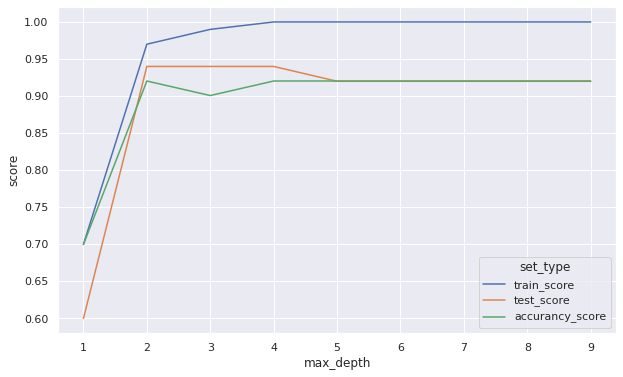

In [295]:
sns.set(rc={'figure.figsize':(10,6)})
scores_data_short = scores_data_long.query("max_depth<10")
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_short)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

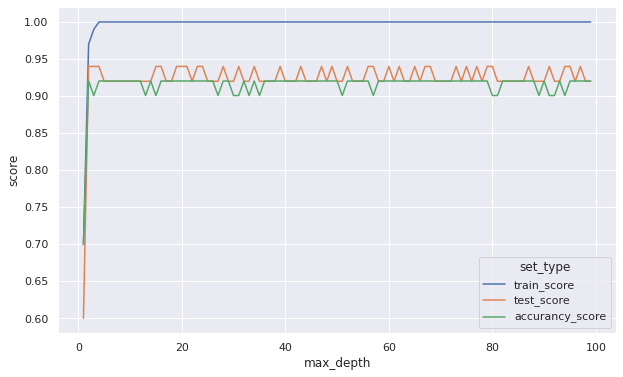

In [296]:
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)